In [1]:
##Predict Admssion Problem Prediction
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
df=pd.read_csv(r"D:\ineuron\MachineLearningFiles\ML1\Linear Regression\LinearRegression-master\LinearRegressionTillCloud\Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.size

4500

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
df["GRE Score"].mode()[0]

312.0

In [9]:
df["GRE Score"].fillna(df["GRE Score"].mode()[0],inplace=True)

In [10]:
df["GRE Score"].isnull().sum()

0

In [11]:
df["TOEFL Score"].mode()[0]

110.0

In [12]:
#Replace Tefl with mode University Rating By Mean
df["TOEFL Score"].fillna(df["TOEFL Score"].mode()[0],inplace=True)

In [13]:
df["University Rating"].fillna(df["University Rating"].mean(),inplace=True)

In [14]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,312.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [16]:
#Dropping unnecessry columns
x=df.drop(["Chance of Admit","Serial No."],axis=1)
y=df["Chance of Admit"]

In [17]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [18]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

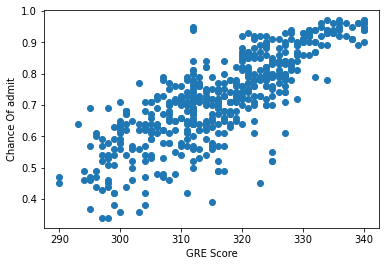

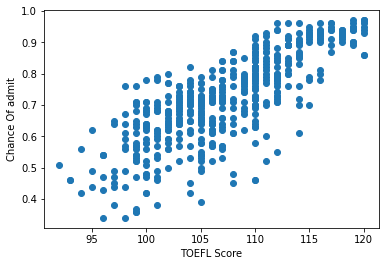

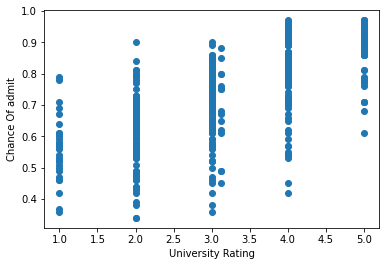

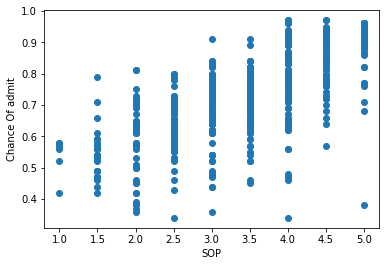

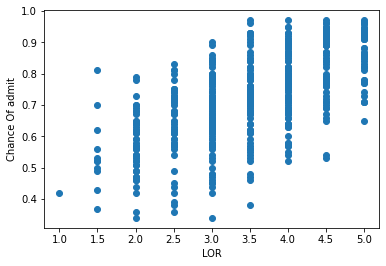

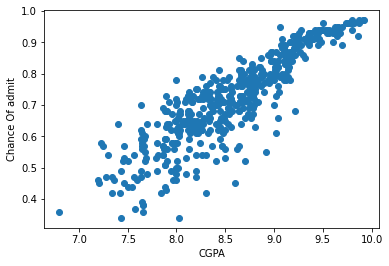

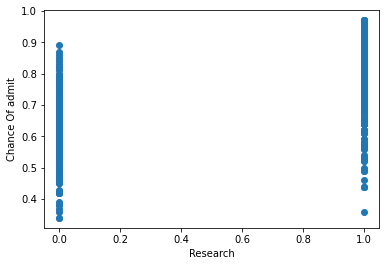

In [19]:
for i in x.columns:
    if(i!="Chance of Admit"):
        plt.scatter(x[i],y)
        plt.xlabel(i)
        plt.ylabel("Chance Of admit")
        plt.show()

In [20]:
#Scale the data if needed
from sklearn.preprocessing import StandardScaler
scaler_feaure=StandardScaler()
scaler_label=StandardScaler()
scaled_data=scaler_feaure.fit_transform(x)
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [21]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [22]:
scaled_data[0]

array([1.85052822, 1.77547686, 0.77890565, 1.13735981, 1.09894429,
       1.77680627, 0.88640526])

In [23]:
#Splitting the data ino train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)

In [24]:
train_x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
221,316.0,110.0,3.121649,3.5,4.0,8.56,0
435,309.0,105.0,2.000000,2.5,4.0,7.68,0
335,325.0,111.0,4.000000,4.0,4.5,9.11,1
476,304.0,104.0,3.000000,2.5,2.0,8.12,0
80,312.0,105.0,3.000000,2.0,3.0,8.02,1


In [25]:
test_x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
69,328.0,115.0,4.0,4.5,4.0,9.16,1
29,310.0,99.0,2.0,1.5,2.0,7.30,0
471,311.0,103.0,3.0,2.0,4.0,8.09,0
344,295.0,96.0,2.0,1.5,2.0,7.34,0
54,322.0,110.0,3.0,3.0,3.5,8.00,0


In [26]:
train_y.head()

221    0.75
435    0.55
335    0.83
476    0.62
80     0.50
Name: Chance of Admit, dtype: float64

In [27]:
test_y.head()

69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
Name: Chance of Admit, dtype: float64

In [28]:
train_x.shape

(335, 7)

In [29]:
train_y.shape

(335,)

In [30]:
test_x.shape

(165, 7)

In [31]:
test_y.shape

(165,)

In [32]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [33]:
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

0.8076993525686706

In [34]:
#Passing x value to fetch predicted y value
reg.predict(test_x.head())

array([0.85868396, 0.47100161, 0.6280096 , 0.44578053, 0.64598598])

In [35]:
#Actual Value
test_y

69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
       ... 
5      0.90
269    0.77
267    0.73
456    0.51
127    0.78
Name: Chance of Admit, Length: 165, dtype: float64

In [36]:
reg.predict([[300,110,5,5,5,10,1]])

array([0.93409108])

In [37]:
filename="AdmitResult1.pickle"
pickle.dump(reg,open(filename,"wb"))

In [38]:
#Predicting from the saved model
#Pass the features i.e. the 7 x values , Gre Score,Toefl Score
loadmodel=pickle.load(open(filename,"rb"))
a=loadmodel.predict([[300,110,5,5,5,10,1]])
a

array([0.93409108])

Problem 2 For Linear Regression
This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [39]:
D:\ineuron\MachineLearningFiles\ML1\Linear Regression\LinearRegression-master\LinearRegressionTillCloud

SyntaxError: unexpected character after line continuation character (<ipython-input-39-64aa118d175b>, line 1)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [41]:
data=pd.read_csv(r"D:\ineuron\MachineLearningFiles\ML1\Linear Regression\LinearRegression-master\LinearRegressionTillCloud\Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [42]:
data.shape

(200, 5)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [44]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [45]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [46]:
#data.drop(["Unnamed: 0"],axis=1)

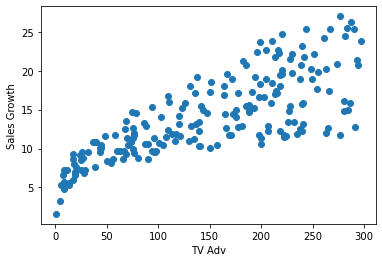

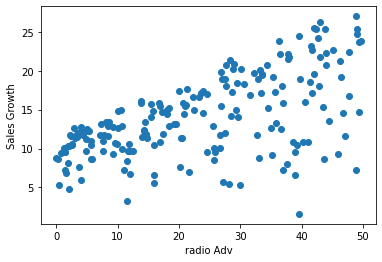

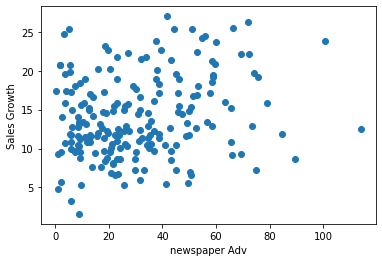

In [47]:
for i in data.columns:
    if(i!="sales")&(i!="Unnamed: 0"):
        plt.scatter(data[i],data.sales)
        plt.xlabel(i + " Adv")
        plt.ylabel("Sales Growth")
        plt.show()

In [48]:
data.sales

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

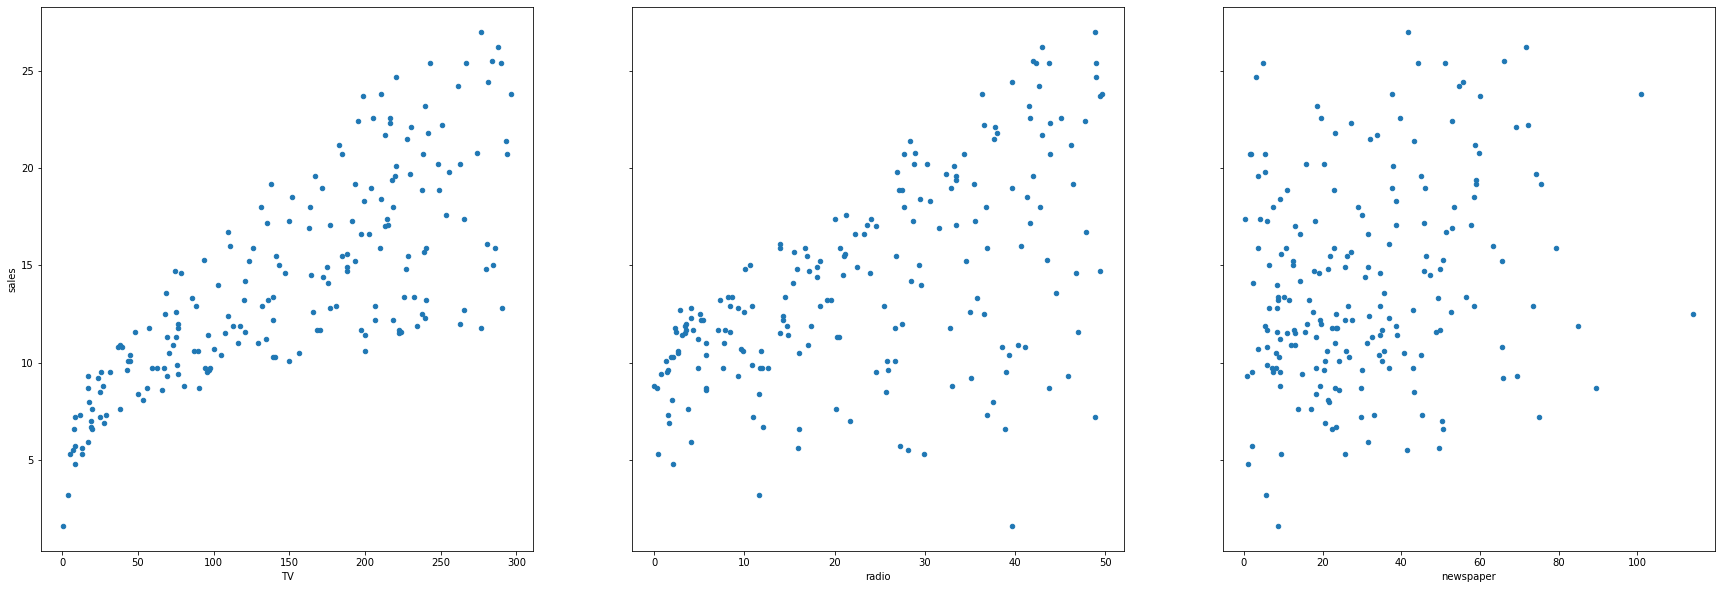

In [49]:
# visualize the relationship between the features and the response using scatterplots
fig,axs=plt.subplots(1,3,sharey=True)
data.plot(kind="scatter",x="TV",y="sales",ax=axs[0],figsize=(15,10))
data.plot(kind="scatter",x="radio",y="sales",ax=axs[1],figsize=(15,10))
data.plot(kind="scatter",x="newspaper",y="sales",ax=axs[2],figsize=(30,10))

In [50]:
#create x and y data
feature_cols=["TV"]
x=data[feature_cols]
y=data.sales

#import fit
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

#print intercept and Coefficients
print(lm.intercept_)
print(lm.coef_)
#unir increase in TV as adv is results into 0.047 increase in sales, i.e. 1000$ spent in TV adv will result into 47.5  dollers

7.032593549127693
[0.04753664]


In [51]:
#If the expense on TV ad is $50000, what will be the sales prediction for that market?
#y=mx+c
(0.04753664*50)+7.032593549127693

9.409425549127693

In [52]:
#This it will result in sales increase by 94094

In [53]:
#With Code
x_new=pd.DataFrame({"TV":[50]})
x_new
lm.predict(x_new)

array([9.40942557])

In [54]:
#Plotting the lst sq line
data.TV.min

<bound method Series.min of 0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64>

In [55]:
# create a DataFrame with the minimum and maximum values of TV
x_new=pd.DataFrame({"TV" : [data.TV.min(),data.TV.max()]})
x_new

,TV
0,0.7
1,296.4


In [56]:
preds=lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

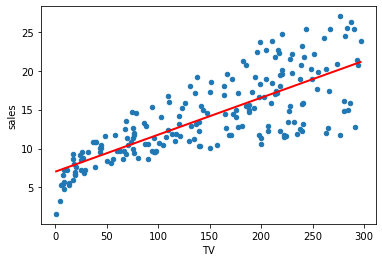

In [57]:
data.plot(kind="scatter",x="TV",y="sales")
#Plotting the least square ln
plt.plot(x_new,preds,c="red",linewidth=2)

In [58]:
import statsmodels.formula.api as smf
lm=smf.ols(formula="sales ~ TV",data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        12:32:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [61]:
lm.rsquared

0.611875050850071

In [62]:
lm.rsquared_adj

0.6099148238341623

In [63]:
#Using TV ,Radio ,Newspaper
feature_cols=["TV", "radio" , "newspaper"]
y=data.sales
x=data[feature_cols]

from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
lm.fit(x,y)

#print(lm.intercept_)
#print(lm.coef_)

LinearRegression()

In [64]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [65]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
lm=smf.ols(formula="sales~ TV  + radio + newspaper" ,data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        12:32:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lm=smf.ols(formula="sales ~ TV + radio + newspaper",data=data).fit()
print(lm.rsquared)
print(lm.rsquared_adj)

0.8972106381789522
0.8956373316204668


In [67]:
lm=smf.ols(formula="sales ~ TV",data=data).fit()
print(lm.rsquared)
print(lm.rsquared_adj)

0.611875050850071
0.6099148238341623


In [68]:
lm=smf.ols(formula="sales ~radio",data=data).fit()
print(lm.rsquared)
print(lm.rsquared_adj)

0.33203245544529525
0.32865888198794835


In [69]:
lm=smf.ols(formula="sales ~newspaper",data=data).fit()
print(lm.rsquared)
print(lm.rsquared_adj)

0.05212044544430516
0.04733317496675127


In [70]:
lm=smf.ols(formula="sales ~ TV + radio",data=data).fit()
print(lm.rsquared)
print(lm.rsquared_adj)

0.8971942610828956
0.8961505479974428


Handling Categorical Predictors with Two Categories

In [71]:
import numpy as np

#setting the seed
np.random.seed(12345)
# create a Series of booleans in which roughly half are True
nums=np.random.rand(len(data))
mask_large=nums>0.5

data["scale"]="small"
data.loc[mask_large,"scale"]="large"
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


In [72]:
data["IsLarge"]=data.scale.map({"small" : 0 ,"large" : 1.})
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1.0
1,2,44.5,39.3,45.1,10.4,small,0.0
2,3,17.2,45.9,69.3,9.3,small,0.0
3,4,151.5,41.3,58.5,18.5,small,0.0
4,5,180.8,10.8,58.4,12.9,large,1.0


In [81]:
#Predicting using the isLarge Function
feature_cols=["TV","radio","newspaper","IsLarge"]
x=data[feature_cols]
y=data.sales

lm=LinearRegression()
lm.fit(x,y)

i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i+=1

The Coefficient of  TV  is:  0.045719820924362775
The Coefficient of  radio  is:  0.1887281431342787
The Coefficient of  newspaper  is:  -0.0010976794483516655
The Coefficient of  IsLarge  is:  0.05742385085482775


Handling Categorical variables with More than Two Categories

In [84]:
np.random.seed(123456)

#np.random.rand(len(data))

In [94]:

np.random.seed(123456)
#Assign 1/3 observation to each group
nums = np.random.rand(len(data))
mask_suburban=(nums>0.33) & (nums<0.66)
mask_urban=(nums>0.66)
data["Targeted Geography"]="Rural"
data.loc[mask_suburban,"Targeted Geography"]="SubUrban"
data.loc[mask_urban,"Targeted Geography"]="Urban"
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge,Targeted Geography
0,1,230.1,37.8,69.2,22.1,large,1.0,Rural
1,2,44.5,39.3,45.1,10.4,small,0.0,Urban
2,3,17.2,45.9,69.3,9.3,small,0.0,Rural
3,4,151.5,41.3,58.5,18.5,small,0.0,Urban
4,5,180.8,10.8,58.4,12.9,large,1.0,SubUrban


In [109]:
area_dummies=pd.get_dummies(data["Targeted Geography"],prefix="Targeted Geography").iloc[:,1:]
data1=pd.concat([data,area_dummies],axis=1)
data1.head()

,Unnamed: 0,TV,radio,newspaper,sales,scale,IsLarge,Targeted Geography,Targeted Geography_SubUrban,Targeted Geography_Urban
0,1,230.1,37.8,69.2,22.1,large,1.0,Rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0.0,Urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0.0,Rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0.0,Urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1.0,SubUrban,1,0


In [113]:
#Predict ta data using the Dummy Variable column
feature_col=['TV', 'radio', 'newspaper','IsLarge',"Targeted Geography_SubUrban","Targeted Geography_Urban"]
x=data1[feature_col]
y=data1.sales

lm=LinearRegression()
lm.fit(x,y)

print(feature_cols,lm.coef_)

['TV', 'radio', 'newspaper', 'IsLarge'] [ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


In [111]:
data1.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales', 'scale', 'IsLarge',
       'Targeted Geography', 'Targeted Geography_SubUrban',
       'Targeted Geography_Urban'],
      dtype='object')

In [124]:
#Implementation Of Ridge Lasso and Elastic Net Regression
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set()

In [226]:
#Function for adj r
def adj_r2(x,y):
    r2=regression.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [162]:
data=pd.read_csv(r"D:\ineuron\MachineLearningFiles\ML1\Linear Regression\LinearRegression-master\LinearRegressionTillCloud\Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [163]:
data.describe(include="all")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [164]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [167]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [168]:
data=data.drop(columns=["Serial No."])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


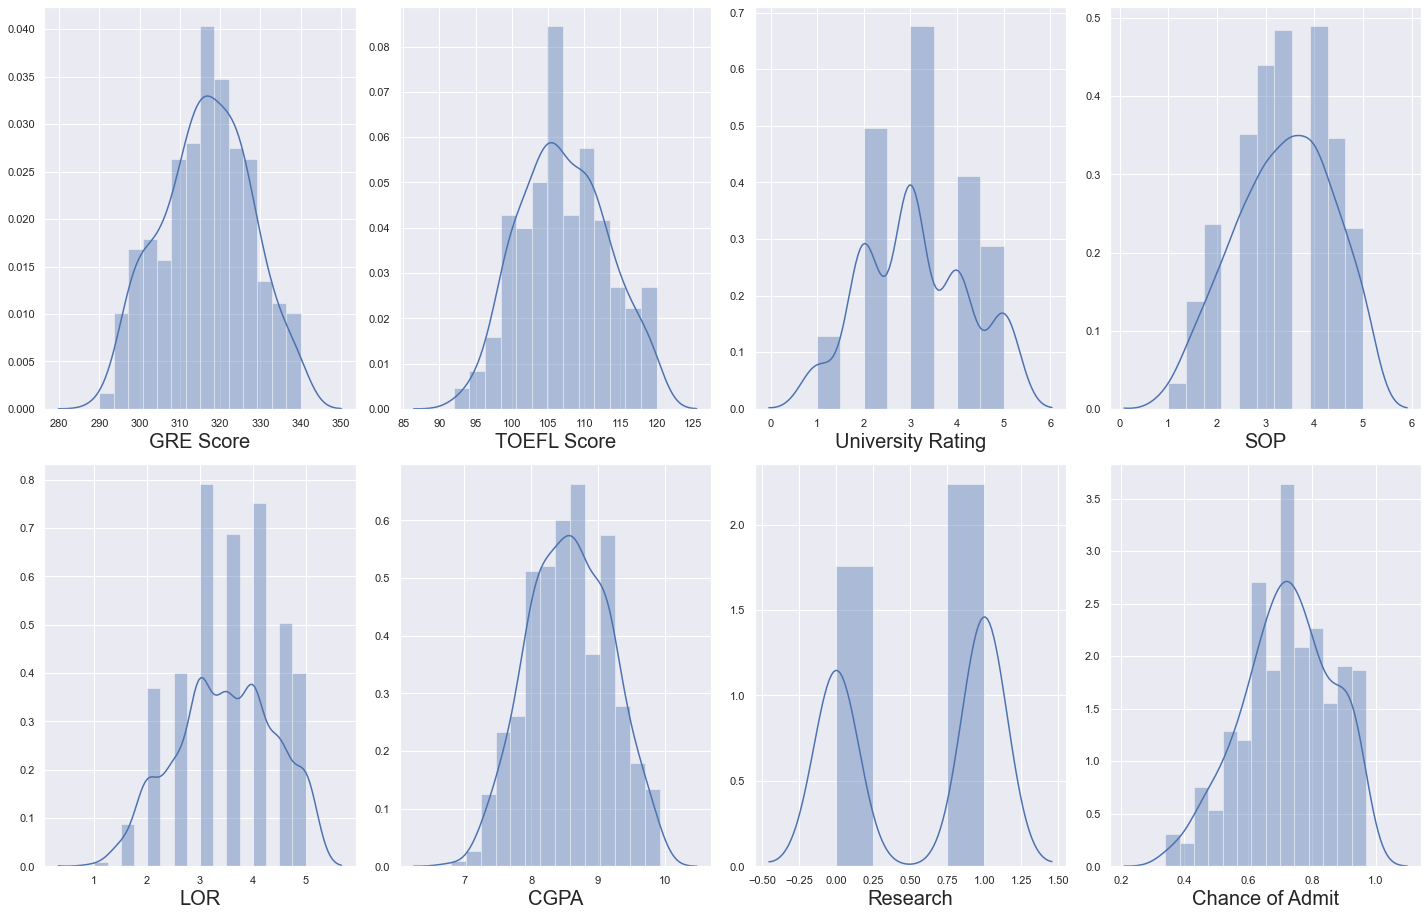

In [181]:
#See data is uniformly distributed or not

plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1
NoOfCol=data.shape[1]

for i in data:
    if plotnumber <= NoOfCol:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

In [182]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [183]:
y=data["Chance of Admit"]
x=data.drop(columns=["Chance of Admit"],axis=1)

In [184]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [185]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

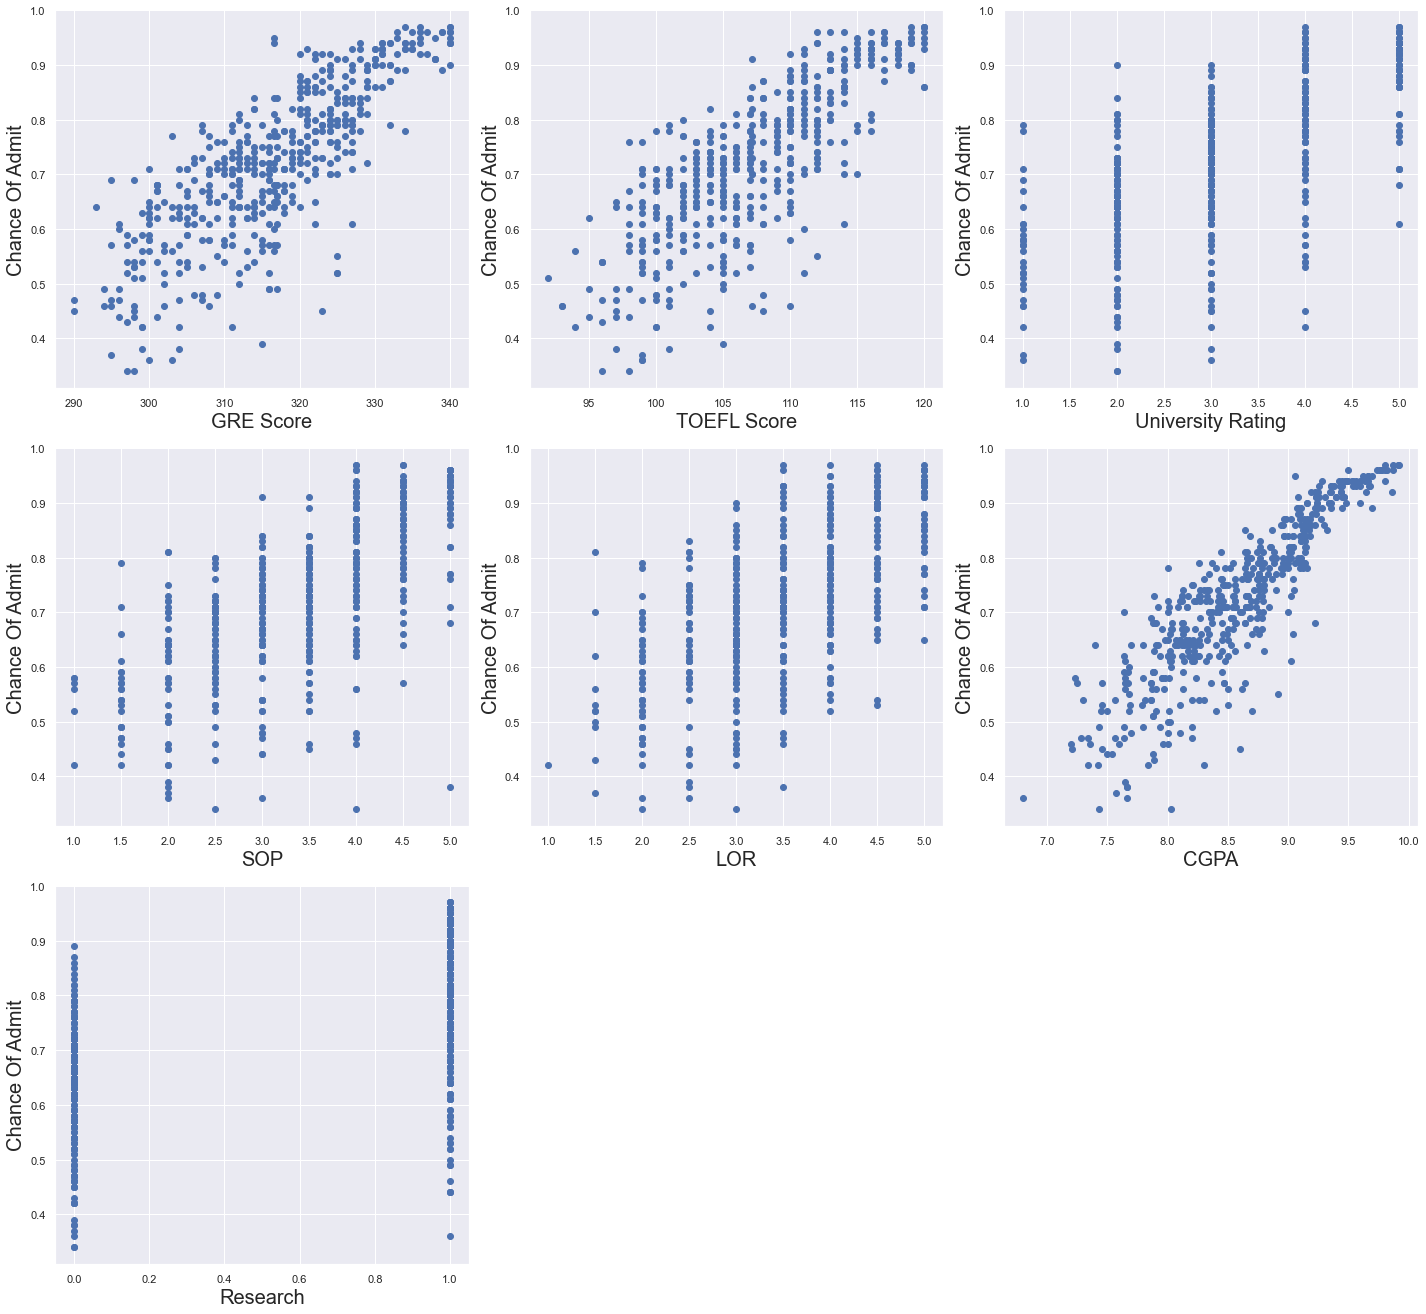

In [195]:
plt.figure(figsize=(20,30),facecolor="white")
i=1
countcol=x.shape[1]
for j in x:
    if i<=countcol:
        ax=plt.subplot(5,3,i)
        plt.scatter(x[j],y)
        plt.xlabel(j,fontsize=20)
        plt.ylabel("Chance Of Admit",fontsize=20)
    i=i+1
plt.tight_layout()

In [199]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = x_scaled
vif=pd.DataFrame()

vif["VIF"]=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

vif["Feature"]=x.columns


In [211]:

vif

,VIF,Feature
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [215]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=555)

In [217]:
x_train

array([[ 3.10221404e-01,  4.65196526e-01,  1.66864169e+00, ...,
         1.09894429e+00,  1.06513044e+00,  8.86405260e-01],
       [-7.71557248e-01,  2.99778313e-01, -9.91254733e-01, ...,
         5.58125251e-01, -2.09265793e-01, -1.12815215e+00],
       [-5.03714802e-02, -6.92730965e-01, -1.04622593e-01, ...,
        -1.60515091e+00, -1.48366203e+00, -1.12815215e+00],
       ...,
       [ 5.12433309e-15,  4.65196526e-01, -1.04622593e-01, ...,
         1.09894429e+00, -1.26512790e-01, -1.12815215e+00],
       [ 4.00369625e-01,  6.30614739e-01,  7.82009548e-01, ...,
         5.58125251e-01,  6.51365433e-01,  8.86405260e-01],
       [-1.40259480e+00, -1.85065846e+00, -1.87788687e+00, ...,
         5.58125251e-01, -1.68226924e+00, -1.12815215e+00]])

In [218]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [219]:
filename="FinalizedModel.pickle"
pickle.dump(regression,open(filename,"wb"))

In [221]:
load_model=pickle.load(open(filename,"rb"))
a=load_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.91456649])

In [223]:
regression.score(x_test,y_test)

0.7766571127117251

In [227]:
adj_r2(x_test,y_test)

0.76329471774576

In [234]:
#Checking the data with Regulariztion

In [240]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

alpha=lasscv.alpha_
alpha

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.7766660460593335

In [244]:
#Looking using Ridge Regression

alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([2.06461356, 9.85822521, 4.84066962, 1.65211546, 0.48359678,
       1.02047836, 6.59799341, 5.56275313, 0.49342696, 9.69100386,
       9.68129308, 4.20876656, 3.61310459, 5.66657805, 9.05196342,
       7.12587103, 3.75982261, 8.72669319, 8.63131931, 9.20564065,
       9.479862  , 4.66436751, 7.87592575, 2.43384204, 2.31595391,
       2.24174425, 1.1984406 , 8.46703864, 8.37246281, 6.5795712 ,
       8.09803471, 1.39983487, 8.12544232, 5.28378684, 5.61511449,
       1.04386786, 1.44247148, 0.47159771, 4.22019459, 1.17284472,
       2.88655127, 3.19222459, 7.27420382, 3.37312011, 3.11430707,
       0.78036057, 8.58078311, 5.57551052, 1.34248904, 3.01887852]),
        cv=10, normalize=True)

In [246]:
ridgecv.alpha_

0.47159771101179415

In [247]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.47159771101179415)

In [248]:
ridge_model.score(x_test,y_test)

0.7767537427590241

In [250]:
#Elastic CV
elasticCV=ElasticNetCV(alphas=None,cv=10)
elasticCV.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [252]:
elasticCV.alpha_

0.00025523433239957517

In [253]:
elasticCV.l1_ratio

0.5

In [254]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.00025523433239957517)

In [255]:
elasticnet_reg.score(x_test,y_test)

0.7768455256729156

In [256]:
D:\ineuron\MachineLearningFiles\ML1\Linear Regression\LinearRegression-master\LinearRegressionTillCloud

SyntaxError: unexpected character after line continuation character (<ipython-input-256-64aa118d175b>, line 1)

In [257]:
#Necessary Imports for importing the required modules to be used
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline   
# this makes sure that the graphs are printed in the jupyter notebook itself

In [258]:
#importing the dataset
dataset= pd.read_csv(r'D:\ineuron\MachineLearningFiles\ML1\Linear Regression\LinearRegression-master\LinearRegressionTillCloud\Position_Salaries.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head()   # to see how the imported data looks like

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [266]:
x=dataset.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [268]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [269]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

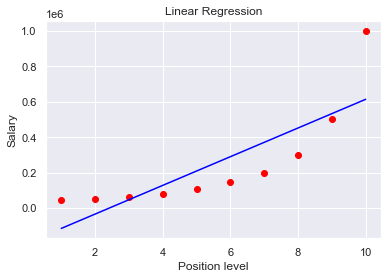

In [270]:
plt.scatter(x,y,color="red")
plt.plot(x,lin_reg.predict(x),color="blue")
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [285]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
print(x_poly)
poly_reg.fit(x_poly,y)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


PolynomialFeatures(degree=4)

In [286]:
poly_reg.fit(x_poly,y)

PolynomialFeatures(degree=4)

In [287]:
lin_reg2=LinearRegression()

lin_reg2.fit(x_poly,y)

LinearRegression()

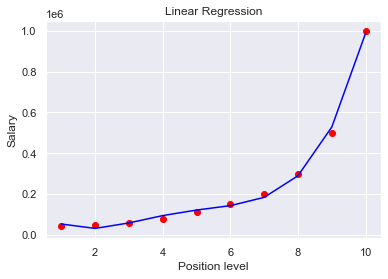

In [288]:
plt.scatter(x,y,color="red")
plt.plot(x,lin_reg2.predict(x_poly),color="blue")
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()